In [40]:
import requests, json, matplotlib
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt

f = open('av_api.key', 'r')
key = f.readline().strip('\n')
f.close()
parameters = {'function':'TIME_SERIES_INTRADAY',
              'symbol':'SCHB',
              'interval':'60min',
             'apikey': key}
category='Time Series (60min)'

# Make a get request with the parameters.
response = requests.get("https://www.alphavantage.co/query?", params=parameters)

# Print the content of the response (the data the server returned)
data = json.loads(response.text)
pprint(data)

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close '
                                 'prices and volume',
               '2. Symbol': 'SCHB',
               '3. Last Refreshed': '2019-02-01 15:30:00',
               '4. Interval': '60min',
               '5. Output Size': 'Compact',
               '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2019-01-11 14:30:00': {'1. open': '62.3000',
                                                 '2. high': '62.3100',
                                                 '3. low': '62.2100',
                                                 '4. close': '62.2335',
                                                 '5. volume': '130602'},
                         '2019-01-11 15:30:00': {'1. open': '62.2200',
                                                 '2. high': '62.3700',
                                                 '3. low': '62.2200',
                                                 '4. close': '62.3500',
     

In [41]:
# Wrangle the data and format it correctly
extracted=data[category]
formatted = newnew = {}

for k, v in extracted.items():
    newnew = {}
    for kk, vv in extracted[k].items():
        new_key = kk.split()[1]
        newnew[new_key] = float(vv)
    dt = datetime.strptime(k, '%Y-%m-%d %H:%M:%S')
    formatted[dt] = newnew
pprint(formatted)

{datetime.datetime(2019, 1, 11, 14, 30): {'close': 62.2335,
                                          'high': 62.31,
                                          'low': 62.21,
                                          'open': 62.3,
                                          'volume': 130602.0},
 datetime.datetime(2019, 1, 11, 15, 30): {'close': 62.35,
                                          'high': 62.37,
                                          'low': 62.22,
                                          'open': 62.22,
                                          'volume': 184596.0},
 datetime.datetime(2019, 1, 14, 9, 30): {'close': 62.03,
                                         'high': 62.105,
                                         'low': 61.78,
                                         'open': 61.8404,
                                         'volume': 201641.0},
 datetime.datetime(2019, 1, 14, 10, 30): {'close': 61.9901,
                                          'high': 62.15,
           

In [42]:
new = list()
dates = matplotlib.dates.date2num(list(formatted.keys()))
for k, v in formatted.items():
    new.append(v['close'])

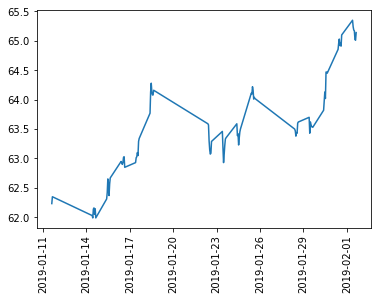

In [43]:
plt.xticks(rotation=90)
plt.plot_date(dates, new, '-')